### Dataset Description

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("Train.csv")
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [3]:
len(df[df.columns[0]].unique())

1559

In [4]:
df1=df.copy()

In [5]:
df1.drop("Item_Identifier",inplace=True,axis=1)

In [6]:
df1.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [7]:
df1.isnull().sum()

Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [8]:
df1["Outlet_Establishment_Year"]=df1["Outlet_Establishment_Year"].apply(lambda x:2021-x)
df1["Outlet_Establishment_Year"].head()

0    22
1    12
2    22
3    23
4    34
Name: Outlet_Establishment_Year, dtype: int64

### Numerical Attributes

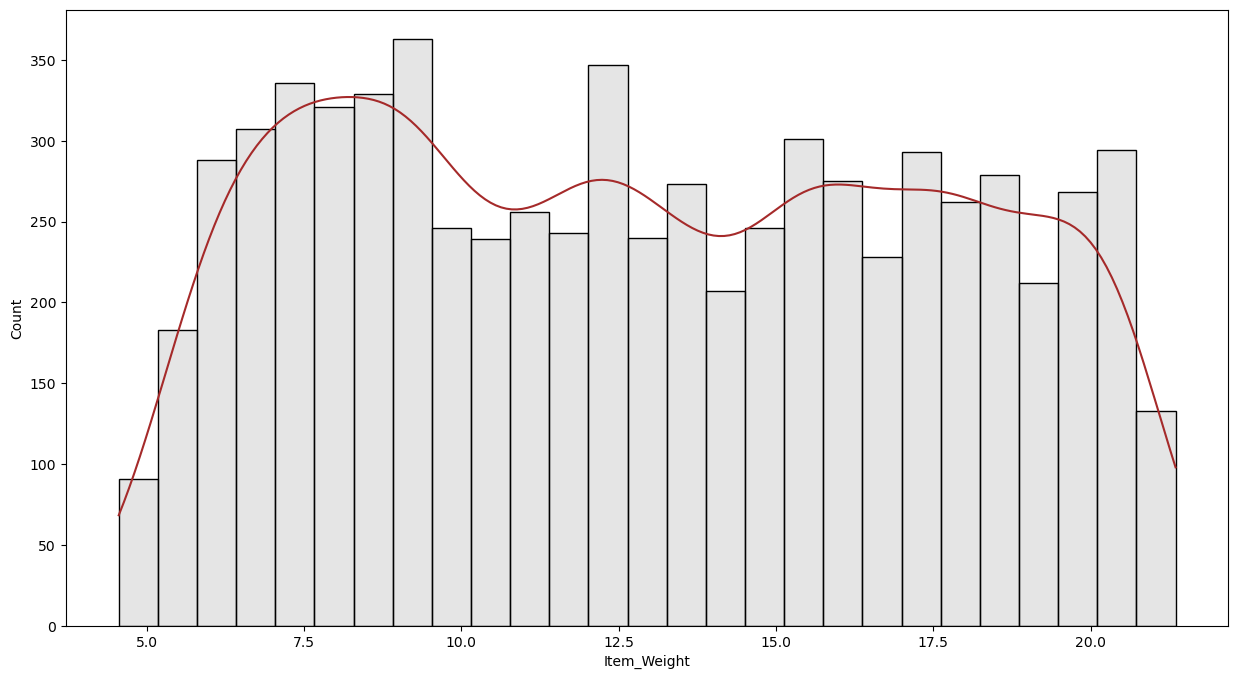

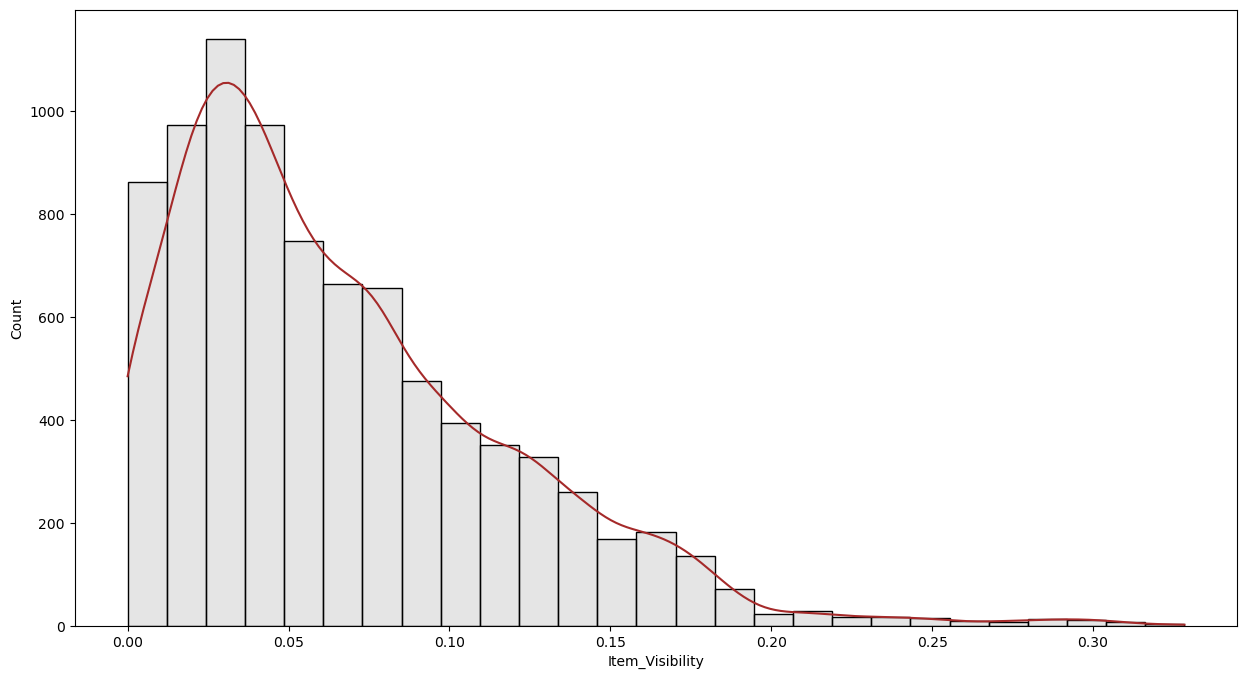

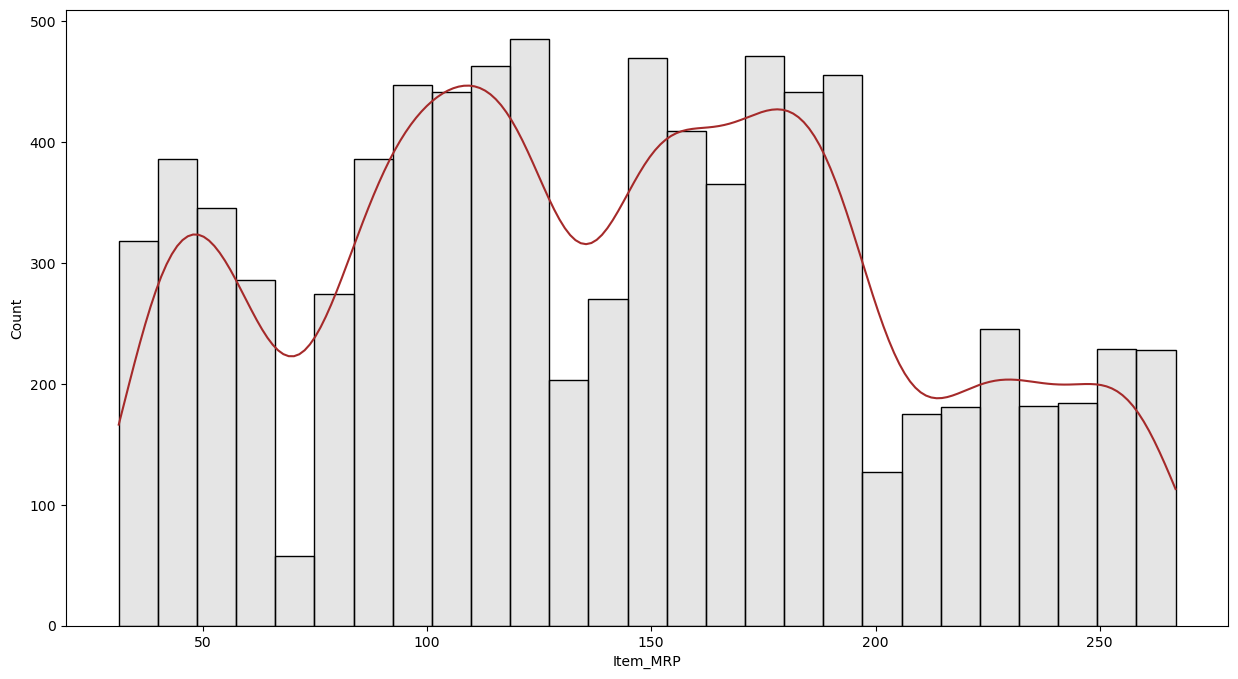

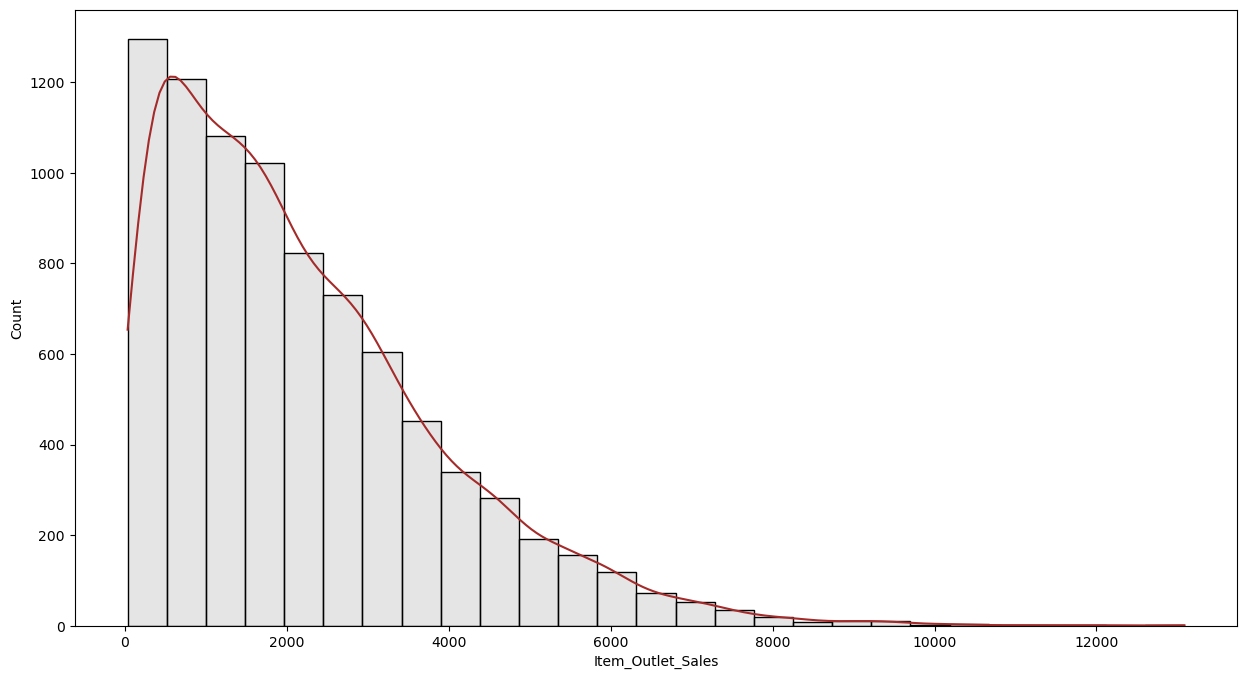

In [9]:
for i in [0,2,4,10]:
  plt.figure(figsize=(15,8))
  ax = sns.histplot(df1[df1.columns[i]], color='0.8', kde=True,bins=27)
  ax.lines[0].set_color('brown')

### Categorical Attributes

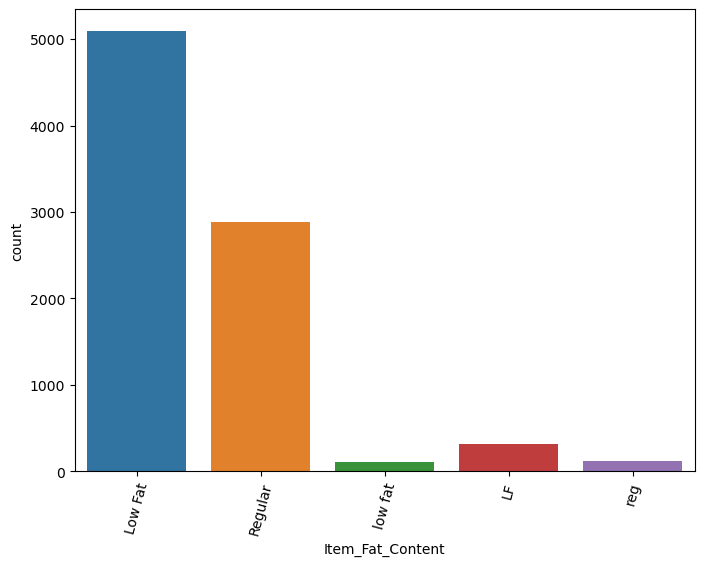

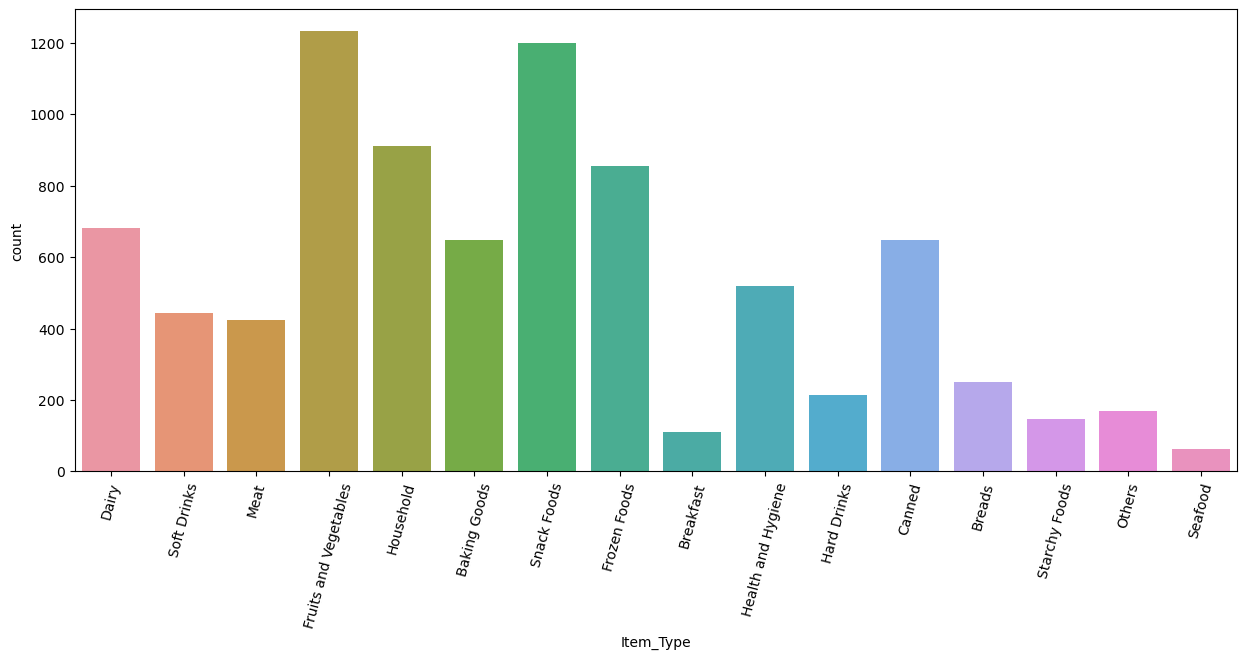

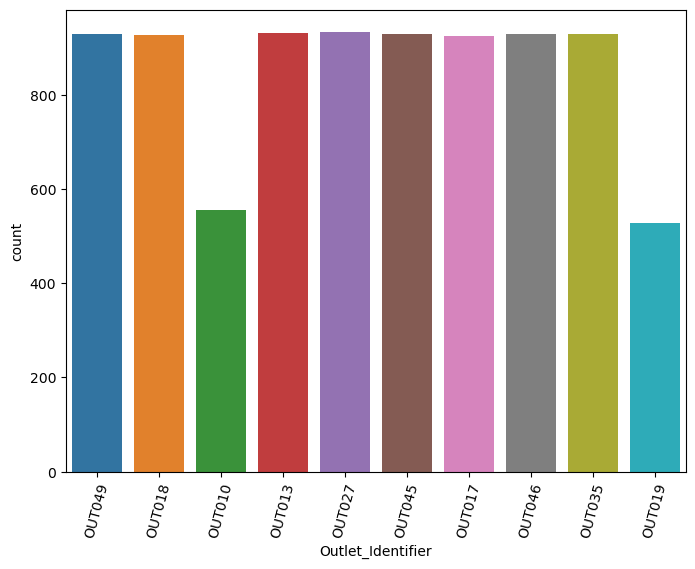

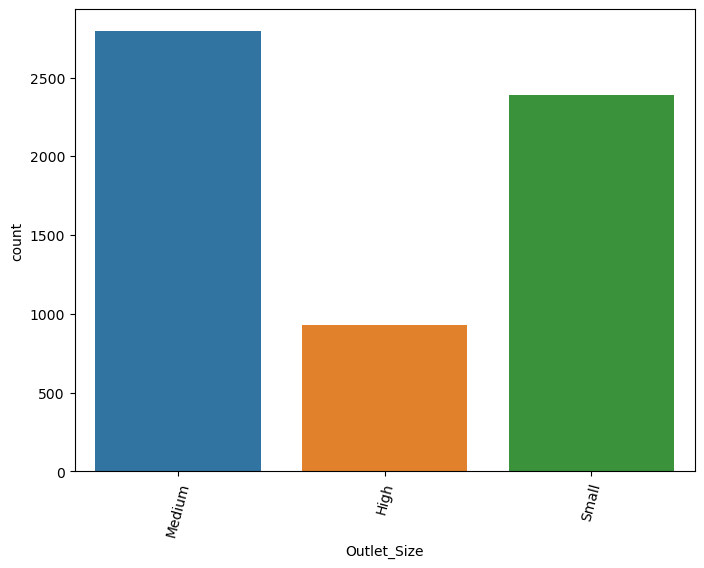

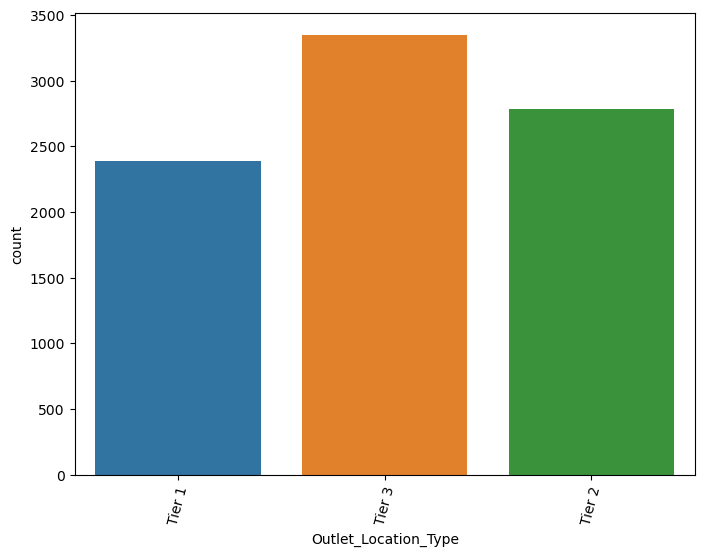

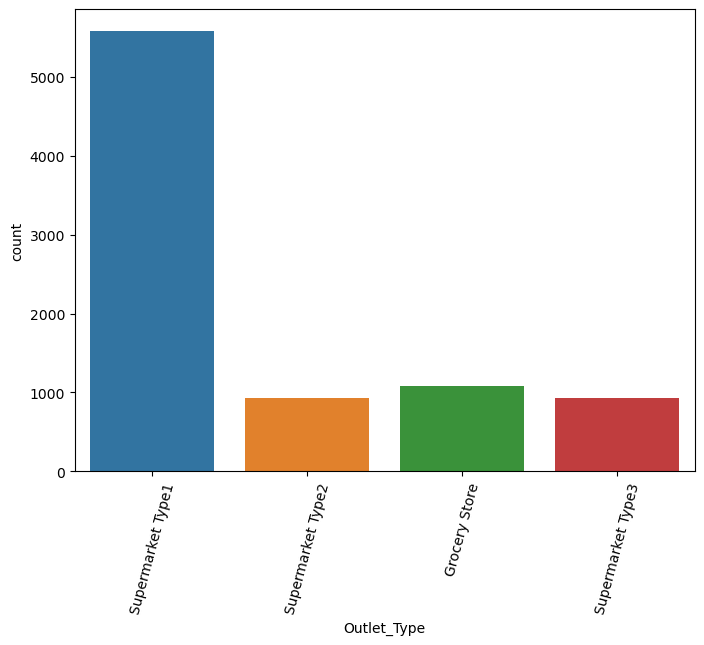

In [10]:
for i in [1,3,5,7,8,9]:
  if i==3:
    plt.figure(figsize=(15,6))
    sns.countplot(x=df1[df1.columns[i]])
    plt.xticks(rotation=75)
    plt.show()
  else:
    plt.figure(figsize=(8,6))
    sns.countplot(x=df1[df1.columns[i]])
    plt.xticks(rotation=75)
    plt.show()

  

In [11]:
df1.Outlet_Identifier.value_counts()

OUT027    935
OUT013    932
OUT049    930
OUT046    930
OUT035    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: Outlet_Identifier, dtype: int64

In [12]:
df2=df1.copy()

In [13]:
df2.dtypes

Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

### Data Preprocessing

In [14]:
from sklearn.preprocessing import StandardScaler,LabelEncoder

In [15]:
from scipy import stats

In [16]:
sc=StandardScaler() # z score normalization
le=LabelEncoder() # Label encoder - labels in ascending order

In [17]:
df2=df1.copy()

In [18]:
media=np.median(df2[df2.columns[0]].dropna()) #median does not support nan values
print(media)

12.6


In [19]:
class preprocess:
  
  def nan_check(self,cols):               # remove nan values for numeric and discrete attributes
    for i in cols:
      if df2.dtypes[i]=="float64" or df2.dtypes[i]=="int64":
        df2[df2.columns[i]].fillna(value=media,inplace=True)
      
      if  df2.dtypes[i]=="object":
        df2[df2.columns[i]].fillna(stats.mode(df2[df2.columns[i]])[0][0],inplace=True)
    return df2
      
  def numeric(self,cols):                # apply standard scalar to numeric attributes
    for i in cols:
      df2[[df2.columns[i]]]=sc.fit_transform(df2[[df2.columns[i]]])
    return df2
   
  def obj(self,cols):                    # apply label encoder to categorical/discrete attributes
    for i in cols:
      df2[[df2.columns[i]]]=le.fit_transform(df2[df2.columns[i]])
    return df2

In [20]:
ob=preprocess() #object of the class

In [21]:
ob.nan_check([0,7]).isna().sum()     # check number of nan values after applying nan_check function

Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [22]:
ob.numeric([0,2,4,6]).head()          # apply standard scalar to numeric attributes

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,-0.831187,Low Fat,-0.970732,Dairy,1.747454,OUT049,-0.139541,Medium,Tier 1,Supermarket Type1,3735.1380
1,-1.630810,Regular,-0.908111,Soft Drinks,-1.489023,OUT018,-1.334103,Medium,Tier 3,Supermarket Type2,443.4228
2,1.108727,Low Fat,-0.956917,Meat,0.010040,OUT049,-0.139541,Medium,Tier 1,Supermarket Type1,2097.2700
3,1.510904,Regular,-1.281758,Fruits and Vegetables,0.660050,OUT010,-0.020085,Medium,Tier 3,Grocery Store,732.3800
4,-0.918719,Low Fat,-1.281758,Household,-1.399220,OUT013,1.293934,High,Tier 3,Supermarket Type1,994.7052


In [23]:
ob.obj([1,3,5,7,8,9]).head()       # apply label encoder to categorical/discrete attributes

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,-0.831187,1,-0.970732,4,1.747454,9,-0.139541,1,0,1,3735.1380
1,-1.630810,2,-0.908111,14,-1.489023,3,-1.334103,1,2,2,443.4228
2,1.108727,1,-0.956917,10,0.010040,9,-0.139541,1,0,1,2097.2700
3,1.510904,2,-1.281758,6,0.660050,0,-0.020085,1,2,0,732.3800
4,-0.918719,1,-1.281758,9,-1.399220,1,1.293934,0,2,1,994.7052


In [24]:
df2.head()            # normalized dataset to be fed to the ML models

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,-0.831187,1,-0.970732,4,1.747454,9,-0.139541,1,0,1,3735.1380
1,-1.630810,2,-0.908111,14,-1.489023,3,-1.334103,1,2,2,443.4228
2,1.108727,1,-0.956917,10,0.010040,9,-0.139541,1,0,1,2097.2700
3,1.510904,2,-1.281758,6,0.660050,0,-0.020085,1,2,0,732.3800
4,-0.918719,1,-1.281758,9,-1.399220,1,1.293934,0,2,1,994.7052


In [25]:
df2["Item_Type"].unique()

array([ 4, 14, 10,  6,  9,  0, 13,  5,  2,  8,  7,  3,  1, 15, 11, 12])

In [26]:
df2.to_csv("new_modifs.csv",index=False)    # this file can be used directly to train ML models without preprocessing

In [27]:
df3=df2.copy()       # copy of the preprocessed dataframe

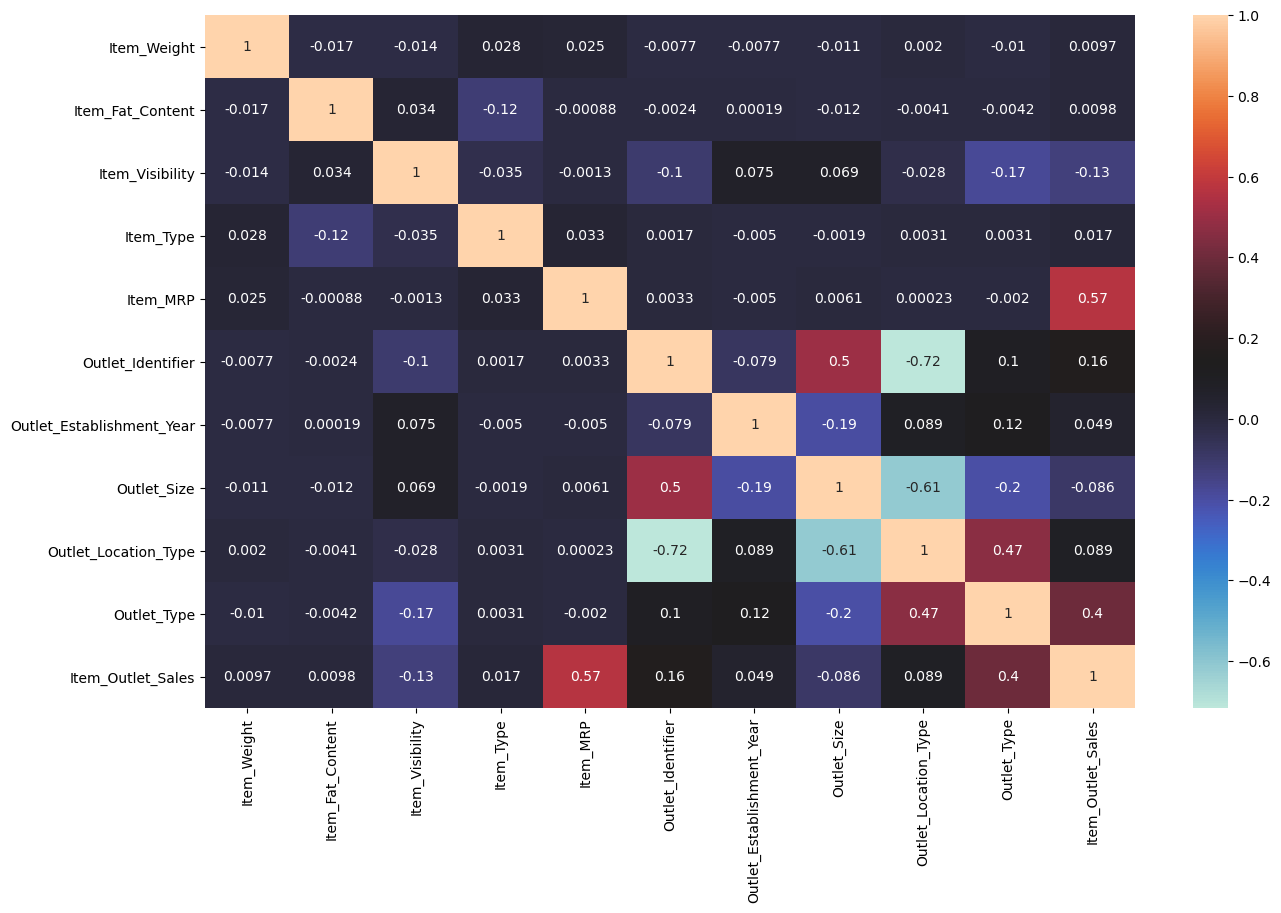

In [28]:
plt.figure(figsize=(15,9))
sns.heatmap(df3.corr(),annot=True,cmap="icefire")

### Applying the ML algorithms

In [29]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor,ExtraTreesRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error
from sklearn.model_selection import train_test_split

In [30]:
df3.drop("Item_Outlet_Sales",inplace=True,axis=1)

In [31]:
x = df3
y = df2["Item_Outlet_Sales"]

In [32]:
x.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,-0.831187,1,-0.970732,4,1.747454,9,-0.139541,1,0,1
1,-1.630810,2,-0.908111,14,-1.489023,3,-1.334103,1,2,2
2,1.108727,1,-0.956917,10,0.010040,9,-0.139541,1,0,1
3,1.510904,2,-1.281758,6,0.660050,0,-0.020085,1,2,0
4,-0.918719,1,-1.281758,9,-1.399220,1,1.293934,0,2,1


In [33]:
y.head()

0    3735.1380
1     443.4228
2    2097.2700
3     732.3800
4     994.7052
Name: Item_Outlet_Sales, dtype: float64

In [34]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.2)

### Creating a class for all ML models

In [35]:
def models(name):
  st=str(name)
  name.fit(x_train,y_train)
  y_pred=name.predict(x_test)
  mae=mean_absolute_error(y_pred,y_test)
  print(mae,"is the mean absolute error for",st.split("(")[0],"\n")
  print("-------------------------------------------------------")


In [36]:
lr = LinearRegression()
rfr = RandomForestRegressor()
ext = ExtraTreesRegressor()

In [37]:
models(lr)
models(rfr)
models(ext)

855.2107779174092 is the mean absolute error for LinearRegression 

-------------------------------------------------------
756.151582620528 is the mean absolute error for RandomForestRegressor 

-------------------------------------------------------
770.3055963788856 is the mean absolute error for ExtraTreesRegressor 

-------------------------------------------------------


In [38]:
lr.score(x_test,y_test)

0.5249288391878413